In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
df = pd.read_csv("features_output.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df.columns))
df.head()

Shape of the training dataset: (1048, 10)

Columns in the training dataset:
 ['file_name', 'num_points', 'frac_flower_points', 'more5_neighbor_flower', 'more5_neighbor_ovr', 'mean_closest_distance', 'std_closest_distance', 'mean_count', 'std_count', 'label']


,file_name,num_points,frac_flower_points,more5_neighbor_flower,more5_neighbor_ovr,mean_closest_distance,std_closest_distance,mean_count,std_count,label
0,Mouse0.xy,157,0.668790,0.783439,0.704762,0.027662,0.010382,4.235669,1.564495,Clean
1,thing.xy,343,0.256560,0.784257,0.522727,0.009741,0.005463,4.276968,1.918673,Clean
2,stair.xy,160,0.468750,0.775000,0.706667,0.013795,0.006745,3.450000,1.283550,Clean
3,vase.xy,317,0.287066,0.687697,0.384615,0.010439,0.004041,3.492114,1.113766,Clean
4,skyhawkocc1.xy,232,0.189655,0.797414,0.613636,0.020222,0.003940,2.905172,0.359080,Clean


In [24]:
label_counts = df['label'].value_counts()
print("\nCounts of each label:\n", label_counts)


Counts of each label:
 label
Distorted    515
Band         385
Clean        148
Name: count, dtype: int64


In [25]:
df.tail()

,file_name,num_points,frac_flower_points,more5_neighbor_flower,more5_neighbor_ovr,mean_closest_distance,std_closest_distance,mean_count,std_count,label
1043,mgen1fp-0.01.xy,153,0.366013,0.771242,0.642857,0.019871,0.010354,3.222222,0.958091,Distorted
1044,mgen1fp.xy,153,0.307190,0.771242,0.510638,0.024106,0.001424,2.725490,0.539127,Clean
1045,mgen1fp-12.5-5.xy,1071,0.533147,0.850607,0.830123,0.006133,0.003852,4.800187,2.028103,Band
1046,mgen1fp-7.5-2.xy,459,0.359477,0.764706,0.672727,0.007747,0.004427,3.479303,1.126579,Band
1047,mgen1fp-10-2.xy,459,0.448802,0.751634,0.655340,0.009542,0.005180,3.880174,1.278624,Band


In [26]:
df.describe()

,num_points,frac_flower_points,more5_neighbor_flower,more5_neighbor_ovr,mean_closest_distance,std_closest_distance,mean_count,std_count
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2007.961832,0.440053,0.789059,0.684359,0.014852,0.006467,3.961136,1.461514
std,10002.919799,0.121083,0.056808,0.132215,0.012215,0.006119,1.200268,0.905496
min,32.000000,0.062500,0.463196,0.166667,0.000250,0.000170,2.437500,0.200726
25%,168.000000,0.362234,0.760093,0.604068,0.006568,0.003093,3.055676,0.898296
50%,310.000000,0.439780,0.793277,0.698887,0.013233,0.005122,3.647139,1.256877
75%,859.000000,0.532825,0.831973,0.790825,0.020380,0.008643,4.629001,1.890621
max,193354.000000,0.875000,0.898089,0.891892,0.110476,0.047880,11.783784,7.265748


In [27]:
X = df.drop(['label', 'file_name'], axis=1)
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

((890, 8), (158, 8))

In [28]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['label'])


y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [30]:
y_train.head()

,label
934,1
499,2
588,2
583,1
2,3


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(10,80),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=15, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d50fa411f60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5110ef3130>})

In [32]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 56}


In [33]:
import pickle

# Save the best model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Print confirmation
print("Model saved as 'best_random_forest_model.pkl'")

Model saved as 'best_random_forest_model.pkl'


In [34]:
y_pred = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)

print('Training set score: {:.4f}'.format(best_rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_rf.score(X_test, y_test)))

Training set score: 0.9640
Test set score: 0.9241


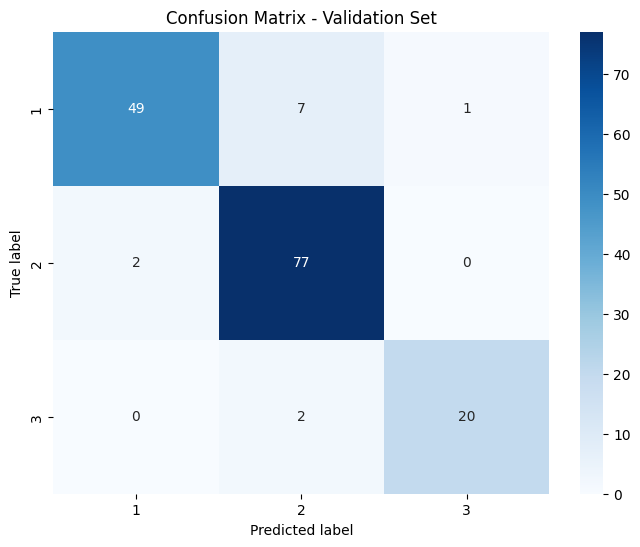

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Set up the figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation Set')
plt.show()

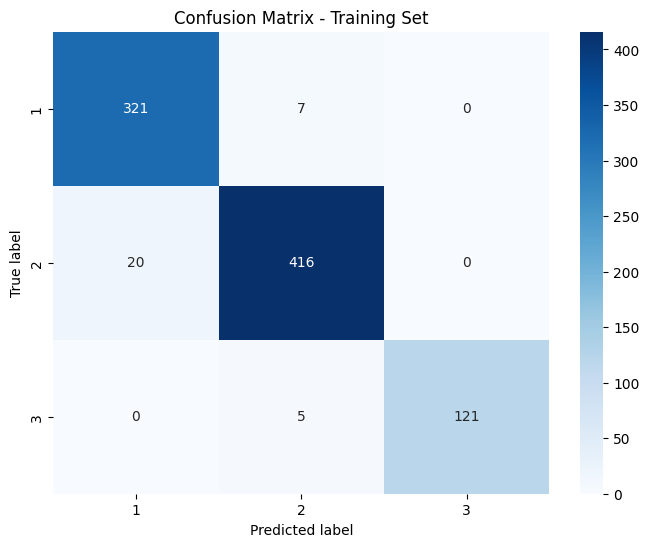

In [37]:
cm = confusion_matrix(y_train, y_pred_train)
# Set up the figure
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training Set')
plt.show()